!! Work-in-progress

# Iris Classification

## Import Libraries:

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [184]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df_iris = pd.read_csv(url, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

## Exploratory Data Analysis:

In [3]:
df_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [6]:
df_iris.isnull().sum()/len(df_iris) # No null values in any of the columns

sepal-length    0.0
sepal-width     0.0
petal-length    0.0
petal-width     0.0
class           0.0
dtype: float64

In [7]:
df_iris['class'].value_counts() # Balanced data set

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [8]:
print("Statistical description of data:\n",df_iris.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Feature Distributions and Correlations:
### Observations:
1. Iris-setosa has comparatively smaller petal-length and width.
2. Petal-length and Petal-width are highly coorelated.

In [9]:
df_iris.groupby("class").mean()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


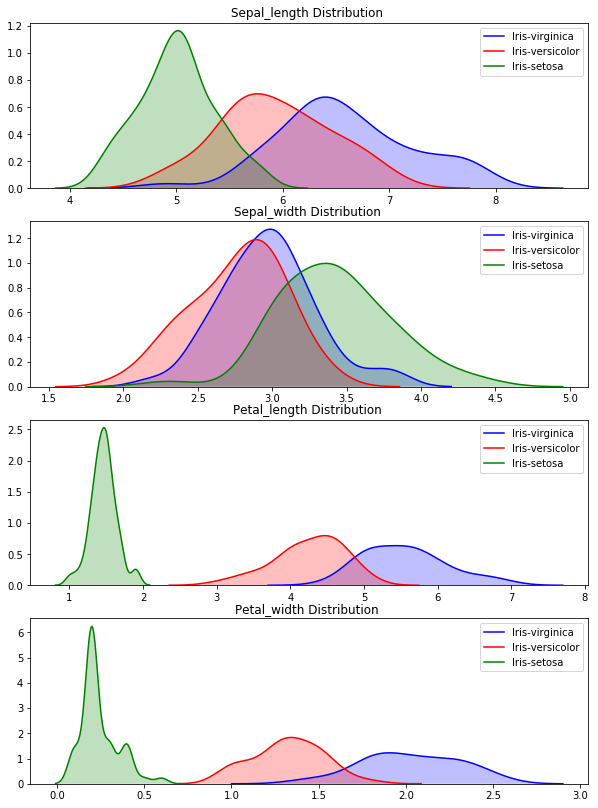

In [10]:
fig, ax = plt.subplots(nrows=4, figsize=(10, 14))
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-virginica'),'sepal-length'] , color='b',shade=True, label='Iris-virginica', ax=ax[0])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-versicolor'),'sepal-length'] , color='r',shade=True, label='Iris-versicolor', ax=ax[0])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-setosa'),'sepal-length'] , color='g',shade=True, label='Iris-setosa', ax=ax[0])
ax[0].set_title("Sepal_length Distribution ")

sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-virginica'),'sepal-width'] , color='b',shade=True, label='Iris-virginica', ax=ax[1])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-versicolor'),'sepal-width'] , color='r',shade=True, label='Iris-versicolor', ax=ax[1])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-setosa'),'sepal-width'] , color='g',shade=True, label='Iris-setosa', ax=ax[1])
ax[1].set_title("Sepal_width Distribution ")

sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-virginica'),'petal-length'] , color='b',shade=True, label='Iris-virginica', ax=ax[2])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-versicolor'),'petal-length'] , color='r',shade=True, label='Iris-versicolor', ax=ax[2])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-setosa'),'petal-length'] , color='g',shade=True, label='Iris-setosa', ax=ax[2])
ax[2].set_title("Petal_length Distribution ")

sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-virginica'),'petal-width'] , color='b',shade=True, label='Iris-virginica', ax=ax[3])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-versicolor'),'petal-width'] , color='r',shade=True, label='Iris-versicolor', ax=ax[3])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-setosa'),'petal-width'] , color='g',shade=True, label='Iris-setosa', ax=ax[3])
ax[3].set_title("Petal_width Distribution ");

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


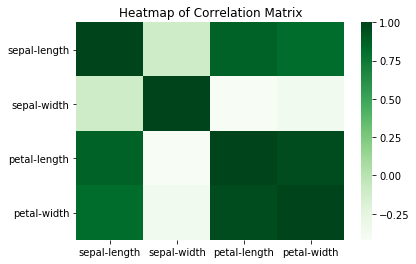

In [11]:
# Create a correlation matrix. What features correlate the most with 'class'? 
corr = df_iris.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Greens')
plt.title('Heatmap of Correlation Matrix')
corr

## Feature Engineering: petal_len_wid_ratio, sepal_len_wid_ratio

In [12]:
df_iris['petal_len_wid_ratio'] = df_iris['petal-length']/df_iris['petal-width']
df_iris['sepal_len_wid_ratio'] = df_iris['sepal-length']/df_iris['sepal-width']

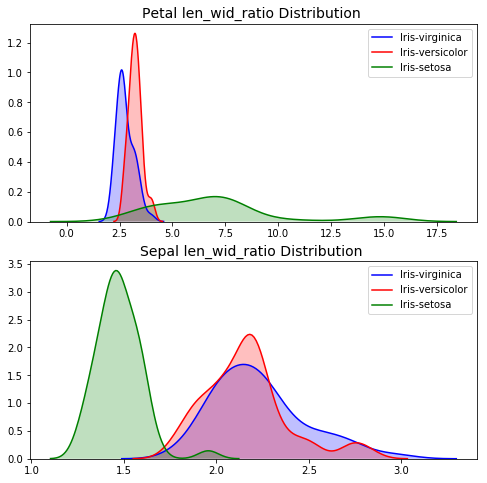

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 8))
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-virginica'),'petal_len_wid_ratio'] , color='b',shade=True, label='Iris-virginica', ax=ax[0])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-versicolor'),'petal_len_wid_ratio'] , color='r',shade=True, label='Iris-versicolor', ax=ax[0])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-setosa'),'petal_len_wid_ratio'] , color='g',shade=True, label='Iris-setosa', ax=ax[0])
ax[0].set_title("Petal len_wid_ratio Distribution ", fontsize=14);

sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-virginica'),'sepal_len_wid_ratio'] , color='b',shade=True, label='Iris-virginica', ax=ax[1])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-versicolor'),'sepal_len_wid_ratio'] , color='r',shade=True, label='Iris-versicolor', ax=ax[1])
sns.kdeplot(df_iris.loc[(df_iris['class'] == 'Iris-setosa'),'sepal_len_wid_ratio'] , color='g',shade=True, label='Iris-setosa', ax=ax[1])
ax[1].set_title("Sepal len_wid_ratio Distribution ", fontsize=14);

## Creting 2 different training and test data sets with different feature variables

In [151]:
X_1 = df_iris.drop(columns=['petal_len_wid_ratio', 'sepal_len_wid_ratio', 'class'])
Y_1 = df_iris['class']
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.2, random_state=20)

In [152]:
X_2 = df_iris[['petal_len_wid_ratio', 'sepal_len_wid_ratio']]
Y_2 = df_iris['class']
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=20)

## Training Models:

In [153]:
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [188]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

def eval_model(X_test, Y_test, model):
    kfold = KFold(random_state=seed, n_splits=10)
    res = cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
    return res

# evaluate each model in turn
print("Model with original feature varibles:\n")
for name, model in models:
    res = eval_model(X_train_1, Y_train_1, model)
    results.append(res)
    names.append(name)
    msg = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(msg)
    
print("\nModel with feature engineered varibles:\n")
for name, model in models:
    res = eval_model(X_train_2, Y_train_2, model)
    results.append(res)
    names.append(name)
    msg = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(msg)

Model with original feature varibles:

RF: 0.966667 (0.055277)
SVM: 0.958333 (0.055902)

Model with feature engineered varibles:

RF: 0.858333 (0.098953)
SVM: 0.875000 (0.067185)


Model with feature engineered variables does not perform well in terms of accuracy. So, I continue with original variables.

## Base Line Random Forest Classifier:

In [173]:
# Base line Random Forest model
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train_1, Y_train_1)
print("Base-line Model | Accuracy on train data set:%.5f" %eval_model(X_train_1,Y_train_1, rf).mean())
print("Base-line Model | Accuracy on test data set:%.5f" %eval_model(X_test_1,Y_test_1, rf).mean())

Base-line Model | Accuracy on train data set:0.96667
Base-line Model | Accuracy on test data set:0.93333


## Random Search for best hyper-parameters:

In [174]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [175]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_1, Y_train_1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [176]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [177]:
best_random = rf_random.best_estimator_
print("RandomizedSearchCV: RandomForest | Accuracy on train data set:%.5f" %eval_model(X_train_1,Y_train_1, best_random).mean())
print("RandomizedSearchCV: RandomForest | Accuracy on test data set:%.5f" %eval_model(X_test_1,Y_test_1, best_random).mean())

RandomizedSearchCV: RandomForest | Accuracy on train data set:0.96667
RandomizedSearchCV: RandomForest | Accuracy on test data set:0.93333


There is no improvement with this set of hyper parameters.

## Grid Search for best hyper-parameters:

Now, I conduct focussed search, I explicitly specify every combination of settings to try. I do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations that are defined. To use Grid Search, I make another grid based on the best values provided by random search:

In [178]:
# Create the parameter grid based on the results of random search 
# Number of trees in random forest
n_estimators = [1250, 1300, 1350, 1400]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth =[100, 110, 120]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True]
param_grid = {
    'bootstrap':bootstrap ,
    'max_depth':max_depth ,
    'max_features':max_features ,
    'min_samples_leaf':min_samples_leaf ,
    'min_samples_split':min_samples_split ,
    'n_estimators': n_estimators
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [179]:
# Fit the grid search to the data
grid_search.fit(X_train_1, Y_train_1)
grid_search.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.8min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1250}

In [180]:
best_grid = grid_search.best_estimator_
print("GridSearchCV: RandomForest | Accuracy on train data set:%.5f" %eval_model(X_train_1,Y_train_1, best_grid).mean())
print("GridSearchCV: RandomForest | Accuracy on test data set:%.5f" %eval_model(X_test_1,Y_test_1, best_grid).mean())

GridSearchCV: RandomForest | Accuracy on train data set:0.96667
GridSearchCV: RandomForest | Accuracy on test data set:0.93333


Accuracy scores did not improve, so I use the base random forest model.

## Feature Importance:

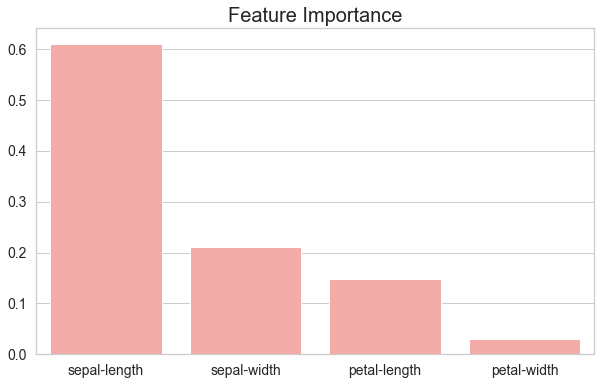

In [204]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X_1.columns)
feature_importances.sort_values(inplace=True, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x=X_1.columns, y=feature_importances, color="r")
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Feature Importance", size=20);